# Problem statement : “How can we improve SAT participation rates ”

### List or hypothesis to answer the problem statement
- H1 : Some state not requires SAT?
- H2 : Average score getting worse. That’s why ppl. don't take a test? (The correlation)

## Import data & Function

In [110]:
#Importing dynamic trio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Read the data files into DataFrames
sat2019= pd.read_csv("data/sat_2019.csv")
sat2018= pd.read_csv("data/sat_2018.csv")
sat2017= pd.read_csv("data/sat_2017.csv")

In [114]:
sat2017.columns #Check sat2017 col.

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [116]:
sat2018.columns #Check sat2018 col.

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [118]:
sat2019.columns #Check sat2019 col.

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')





## Exploring, cleansing, rename, add col.

In [121]:
# Rename columns 
# ['Participation'] to ['Participation_Rate']
# ['Evidence-Based Reading and Writing'] to ['EBRW']
sat2018 = sat2018.rename(columns={'Participation': 'Participation_Rate', 'Evidence-Based Reading and Writing': 'EBRW'})
sat2017 = sat2017.rename(columns={'Participation': 'Participation_Rate', 'Evidence-Based Reading and Writing': 'EBRW'})
sat2019 = sat2019.rename(columns={'Participation Rate': 'Participation_Rate',})

In [123]:
sat2018.info() # Randomly check the work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Participation_Rate  51 non-null     object
 2   EBRW                51 non-null     int64 
 3   Math                51 non-null     int64 
 4   Total               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [125]:
# Add a 'Year' column to each DataFrame
sat2017['Year'] = 2017
sat2018['Year'] = 2018
sat2019['Year'] = 2019

#Combine all DataFrames into one
combined = pd.concat([sat2017, sat2018, sat2019], ignore_index=True)

# Print the combined DataFrame --> to check the combined file
combined.head(5)

,State,Participation_Rate,EBRW,Math,Total,Year
0,Alabama,5%,593,572,1165,2017
1,Alaska,38%,547,533,1080,2017
2,Arizona,30%,563,553,1116,2017
3,Arkansas,3%,614,594,1208,2017
4,California,53%,531,524,1055,2017


In [127]:
# Reorder the col. 
combined_reorder = ['Year','State', 'Participation_Rate', 'EBRW', 'Math', 'Total']

In [129]:
sat_combined= combined[combined_reorder] #Create new df. after cleansing, 
sat_combined #Check the work

,Year,State,Participation_Rate,EBRW,Math,Total
0,2017,Alabama,5%,593,572,1165
1,2017,Alaska,38%,547,533,1080
2,2017,Arizona,30%,563,553,1116
3,2017,Arkansas,3%,614,594,1208
4,2017,California,53%,531,524,1055
...,...,...,...,...,...,...
150,2019,Virginia,68%,567,551,1119
151,2019,Washington,70%,539,535,1074
152,2019,West Virginia,99%,483,460,943
153,2019,Wisconsin,3%,635,648,1283


In [131]:
# Select the col. to check data types
selected_columns = sat_combined[['Year', 'State', 'Participation_Rate', 'EBRW', 'Math', 'Total']]

# Print the data types of the selected columns
print(selected_columns.dtypes)

Year                   int64
State                 object
Participation_Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object


In [25]:
# Figure out why 'Participation Rate' is object 

In [133]:
# Count missing values in each column
missing_values = sat_combined.isnull().sum() #no missing value
print(missing_values) #Out put show no missing values

Year                  0
State                 0
Participation_Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64


In [135]:
sat_combined['Participation_Rate'].unique() #There is '-' thats' why ['Participation Rate'] is object

array(['5%', '38%', '30%', '3%', '53%', '11%', '100%', '83%', '61%',
       '55%', '93%', '9%', '63%', '2%', '4%', '95%', '69%', '76%', '10%',
       '26%', '96%', '70%', '67%', '49%', '12%', '7%', '43%', '65%',
       '71%', '50%', '62%', '60%', '64%', '14%', '6%', '29%', '92%',
       '56%', '99%', '80%', '23%', '82%', '16%', '79%', '52%', '8%',
       '18%', '48%', '97%', '66%', '68%', '28%', '41%', '31%', '94%',
       '54%', '81%', '20%', '51%', '19%', '22%', '—'], dtype=object)

In [137]:
# Ensure the Participation_Rate column is treated as strings
sat_combined['Participation_Rate'] = sat_combined['Participation_Rate'].astype(str)

# Replace '-' and '—' with NaN, then remove '%' sign
sat_combined['Participation_Rate'] = sat_combined['Participation_Rate'].replace(['-', '—'], pd.NA).str.replace('%', '', regex=False)

# Convert to numeric, with coercion for errors
sat_combined['Participation_Rate'] = pd.to_numeric(sat_combined['Participation_Rate'], errors='coerce')

sat_combined['Participation_Rate'] #Check the work


0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
       ... 
150    68.0
151    70.0
152    99.0
153     3.0
154     3.0
Name: Participation_Rate, Length: 155, dtype: float64

In [139]:
sat_combined.columns = sat_combined.columns.str.lower() #Finalize cleansing up by make col. in lower
sat_combined.columns

Index(['year', 'state', 'participation_rate', 'ebrw', 'math', 'total'], dtype='object')

In [141]:
sat_combined['state'].value_counts()

state
Alabama                 3
Alaska                  3
Nevada                  3
New Hampshire           3
New Jersey              3
New Mexico              3
New York                3
North Carolina          3
North Dakota            3
Ohio                    3
Oklahoma                3
Oregon                  3
Pennsylvania            3
Rhode Island            3
South Carolina          3
South Dakota            3
Tennessee               3
Texas                   3
Utah                    3
Vermont                 3
Virginia                3
Washington              3
West Virginia           3
Wisconsin               3
Wyoming                 3
Nebraska                3
Montana                 3
Missouri                3
Mississippi             3
Arizona                 3
Arkansas                3
California              3
Colorado                3
Connecticut             3
Delaware                3
District of Columbia    3
Florida                 3
Georgia                 3
Hawaii

In [143]:
# Drop Puerto Rico & Virgin Islands  *Not state
#The USVI is an organized, unincorporated territory of the United States, meaning it follows U.S. laws but also has its own local government.

In [145]:
sat_combined = sat_combined[~sat_combined['state'].isin(['Puerto Rico', 'Virgin Islands'])] #drop the 'Puerto Rico' or 'Virgin Islands'
sat_combined['state'].value_counts() #Check the work again

state
Alabama                 3
Pennsylvania            3
Nevada                  3
New Hampshire           3
New Jersey              3
New Mexico              3
New York                3
North Carolina          3
North Dakota            3
Ohio                    3
Oklahoma                3
Oregon                  3
Rhode Island            3
Montana                 3
South Carolina          3
South Dakota            3
Tennessee               3
Texas                   3
Utah                    3
Vermont                 3
Virginia                3
Washington              3
West Virginia           3
Wisconsin               3
Nebraska                3
Missouri                3
Alaska                  3
Idaho                   3
Arizona                 3
Arkansas                3
California              3
Colorado                3
Connecticut             3
Delaware                3
District of Columbia    3
Florida                 3
Georgia                 3
Hawaii                  3
Illino


## Exploratory Data Analysis

In [150]:
# Have a look at Summary Statistics
sat_combined.describe()

,year,participation_rate,ebrw,math,total
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2018.000000,44.869281,564.535948,552.019608,1119.732026
std,0.819178,37.094419,46.301362,63.246434,94.162654
min,2017.000000,2.000000,480.000000,52.000000,943.000000
25%,2017.000000,4.000000,531.000000,521.000000,1053.000000
50%,2018.000000,50.000000,554.000000,546.000000,1099.000000
75%,2019.000000,76.000000,614.000000,596.000000,1210.000000
max,2019.000000,100.000000,644.000000,655.000000,1298.000000


In [152]:
# Group by year to see average participation and scores
yearly_trends = sat_combined.groupby('year').agg({'participation_rate': 'mean','total': 'mean'}).reset_index()

print(yearly_trends)

   year  participation_rate        total
0  2017           39.803922  1126.098039
1  2018           45.745098  1120.019608
2  2019           49.058824  1113.078431


In [213]:
#Find andf create variable for average participation rate
# Average participation rate by state
state_participation = sat_combined.groupby('state')['participation_rate'].mean().reset_index()

# Calculate the overall mean participation rate
mean_participation_rate = state_participation['participation_rate'].mean()
mean_participation_rate


44.869281045751634

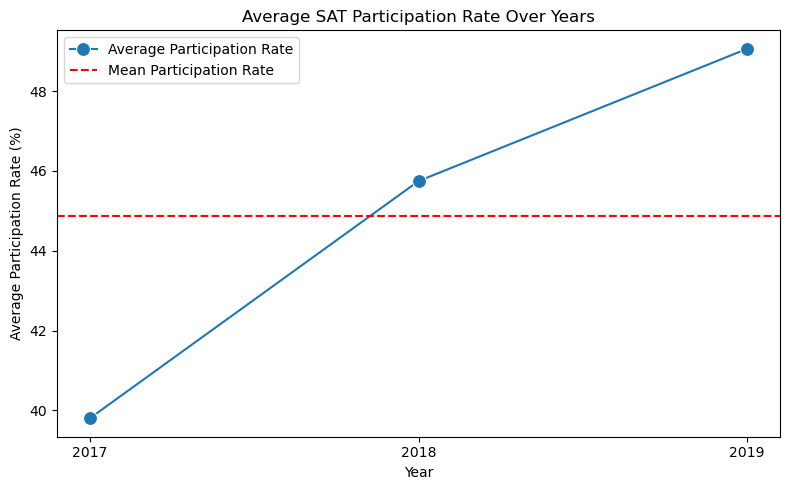

In [217]:

# Plot the trends of Average SAT and benchmark by total average
plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_trends, x='year', y='participation_rate', marker='o', markersize=10,  label='Average Participation Rate')

# Add a mean line as a benchmark
plt.axhline(y=mean_participation_rate, color='red', linestyle='--', label='Mean Participation Rate')

# Customize the plot
plt.title('Average SAT Participation Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Participation Rate (%)')
plt.xticks(yearly_trends['year'])
plt.grid(False)
plt.legend()  
plt.tight_layout()  
plt.show()

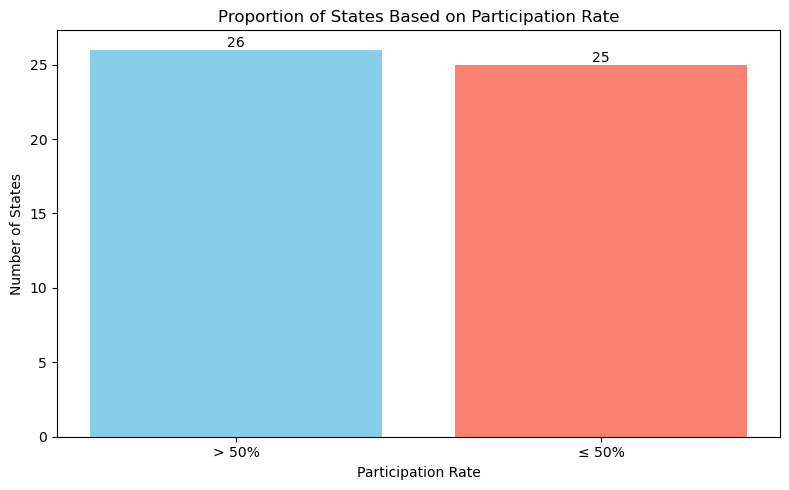

In [168]:
#How many pass 50% 

# Calculate the number of states > 50% and <= 50%
count_above_50 = (state_participation['participation_rate'] > 50).sum()
count_below_equal_50 = (state_participation['participation_rate'] <= 50).sum()

# Conditional filter by value
categories = ['> 50%', '≤ 50%']
counts = [count_above_50, count_below_equal_50]

# SPlotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'])

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Proportion of States Based on Participation Rate')
plt.xlabel('Participation Rate')
plt.ylabel('Number of States')
plt.xticks(rotation=0)  
plt.grid(False)  
plt.tight_layout()

# Display the plot
plt.show()


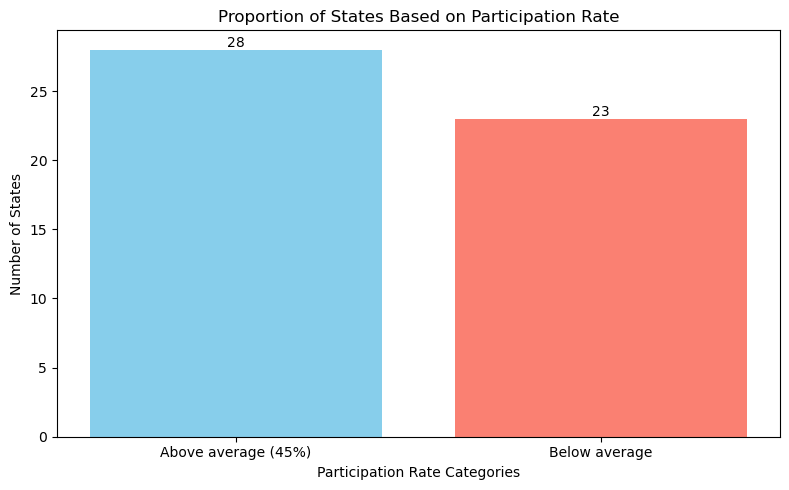

In [198]:
# How many state have participation rate over average  ##45%

# Calculate the number of states > mean (45%) and < mean 
count_above_mean = (state_participation['participation_rate'] > 45).sum()
count_below_equal_mean = (state_participation['participation_rate'] <=45 ).sum()

# Step 4: Prepare data for plotting (without DataFrame)
categories_mean = ['Above average (45%)', 'Below average']
counts = [count_above_mean, count_below_equal_mean]

# Step 5: Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories_mean, counts, color=['skyblue', 'salmon'])

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Proportion of States Based on Participation Rate')
plt.xlabel('Participation Rate Categories')
plt.ylabel('Number of States')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.grid(False)  # Disable grid
plt.tight_layout()

# Display the plot
plt.show()


In [49]:
# Get top 5 lowest participation rates
lowest_participation_states = sat_combined.groupby('state')['participation_rate'].mean().nsmallest(5)
lowest_participation_states

state
North Dakota    2.000000
Iowa            2.666667
Mississippi     2.666667
Nebraska        3.000000
South Dakota    3.000000
Name: participation_rate, dtype: float64

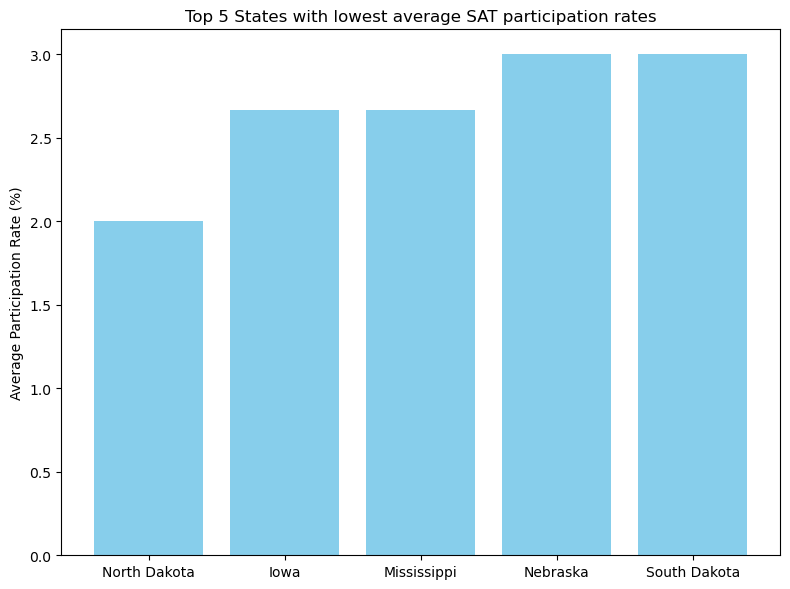

In [93]:
# Plotting the graph for the top 5 lowest participation rates
plt.figure(figsize=(8, 6))
plt.bar(lowest_participation_states.index, lowest_participation_states.values, color='skyblue')
plt.title('Top 5 States with lowest average SAT participation rates')
plt.xlabel('')
plt.ylabel('Average Participation Rate (%)')
plt.xticks(rotation=360, ha='center')
plt.tight_layout()

# Display the plot
plt.show()


In [231]:
#Which state have 100% participation rate 3 years continuesly?? -->These state can be lesson learn to improve the SAT participation rate
print (mean_participation[mean_participation == 100])

state
Connecticut    100.0
Delaware       100.0
Michigan       100.0
Name: participation_rate, dtype: float64


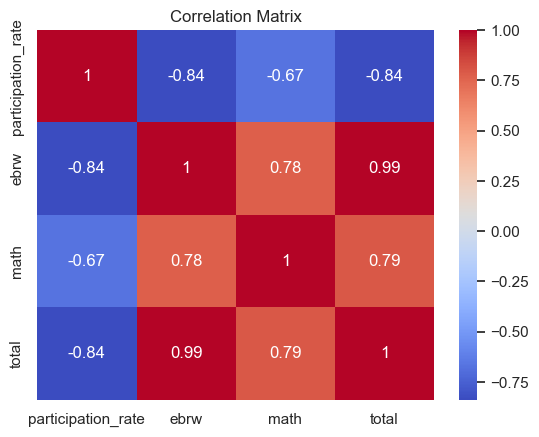

In [1005]:
# Correlation analysis
correlation_matrix = sat_combined[['participation_rate', 'ebrw', 'math', 'total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation between participation rate and total score: -0.84


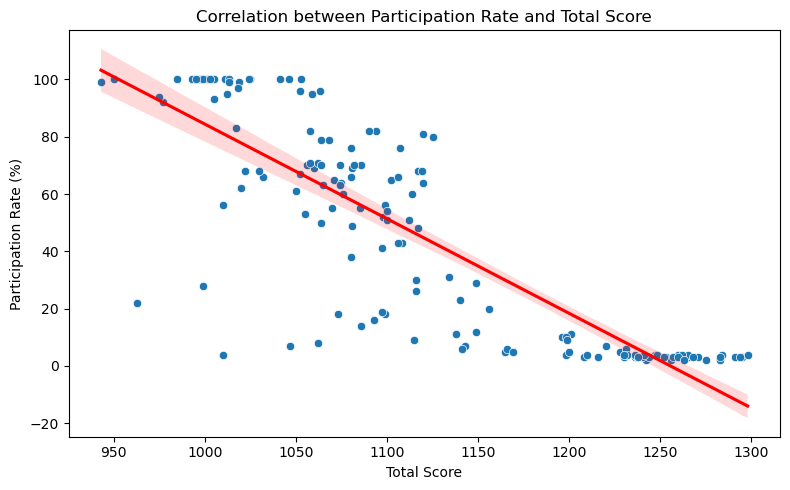

In [202]:
# Calculate the correlation coef.
correlation = sat_combined['participation_rate'].corr(sat_combined['total'])
print(f"Correlation between participation rate and total score: {correlation:.2f}")

# Plot 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sat_combined, x='total', y='participation_rate', marker='o')
sns.regplot(data=sat_combined, x='total', y='participation_rate', scatter=False, color='red')

# Customize the plot
plt.title('Correlation between Participation Rate and Total Score')
plt.xlabel('Total Score')
plt.ylabel('Participation Rate (%)')
plt.grid(False)
plt.tight_layout()

# Step 3: Show the plot
plt.show()

#output is -0.84 
#Negative Correlation: The negative sign suggests that as one variable increases, the other tends to decrease. 
#In this case, as the participation rate increases, the total score tends to decrease, and vice versa.

In [57]:
sat_combined.pivot_table(
    index='year',                   # Use 'year' as the index
    values=['participation_rate', 'ebrw', 'math', 'total'],  # Columns to summarize
    aggfunc=['mean', 'std', 'min', 'max']).transpose()  # Aggregation functions

year                            2017         2018         2019
mean ebrw                 569.117647   563.686275   560.803922
     math                 547.627451   556.235294   552.196078
     participation_rate    39.803922    45.745098    49.058824
     total               1126.098039  1120.019608  1113.078431
std  ebrw                  45.666901    47.502627    46.248035
     math                  84.909119    47.772623    51.290553
     participation_rate    35.276632    37.314256    38.747600
     total                 92.494812    94.155083    97.197910
min  ebrw                 482.000000   480.000000   483.000000
     math                  52.000000   480.000000   460.000000
     participation_rate     2.000000     2.000000     2.000000
     total                950.000000   977.000000   943.000000
max  ebrw                 644.000000   643.000000   636.000000
     math                 651.000000   655.000000   648.000000
     participation_rate   100.000000   100.000000   100.000000
     total               1295.000000  1298.000000  1284.000000

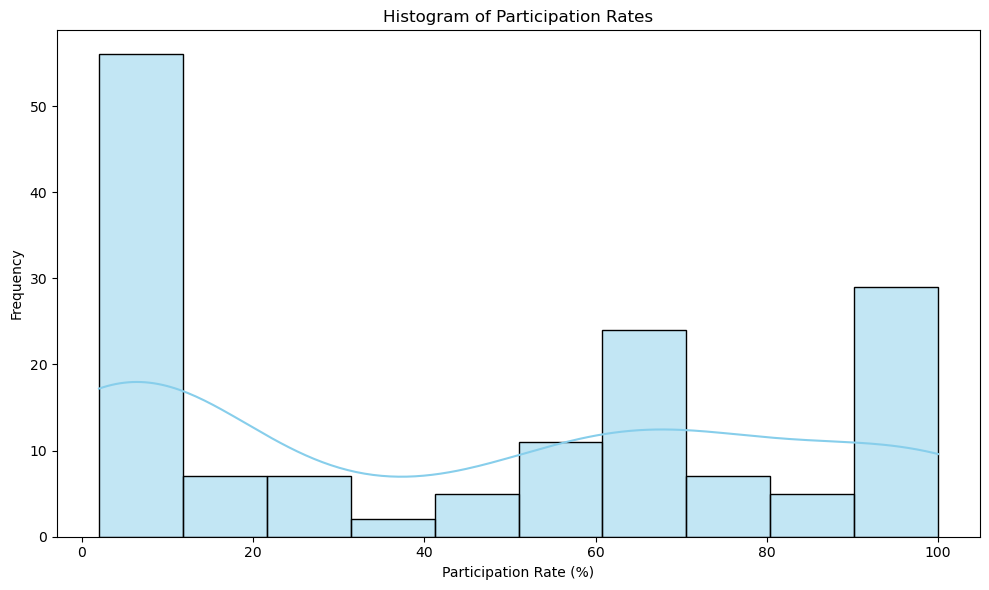

In [186]:
# What is the mean of participation rate (hist) 
#Calculate skewness
skewness = (sat_combined['participation_rate']).skew()
skewness

#Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(sat_combined['participation_rate'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Participation Rates')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.show()


In [188]:
skewness

0.1699994643718558

## This section waiting to be polished with the 'Region' later

/var/folders/7g/mgb0crh96rj56b94vtlg0ln00000gn/T/ipykernel_44421/1815826677.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sat_combined, y='participation_rate', x='state', palette='mako')
/var/folders/7g/mgb0crh96rj56b94vtlg0ln00000gn/T/ipykernel_44421/1815826677.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sat_combined, y='total', x='state', palette='mako')


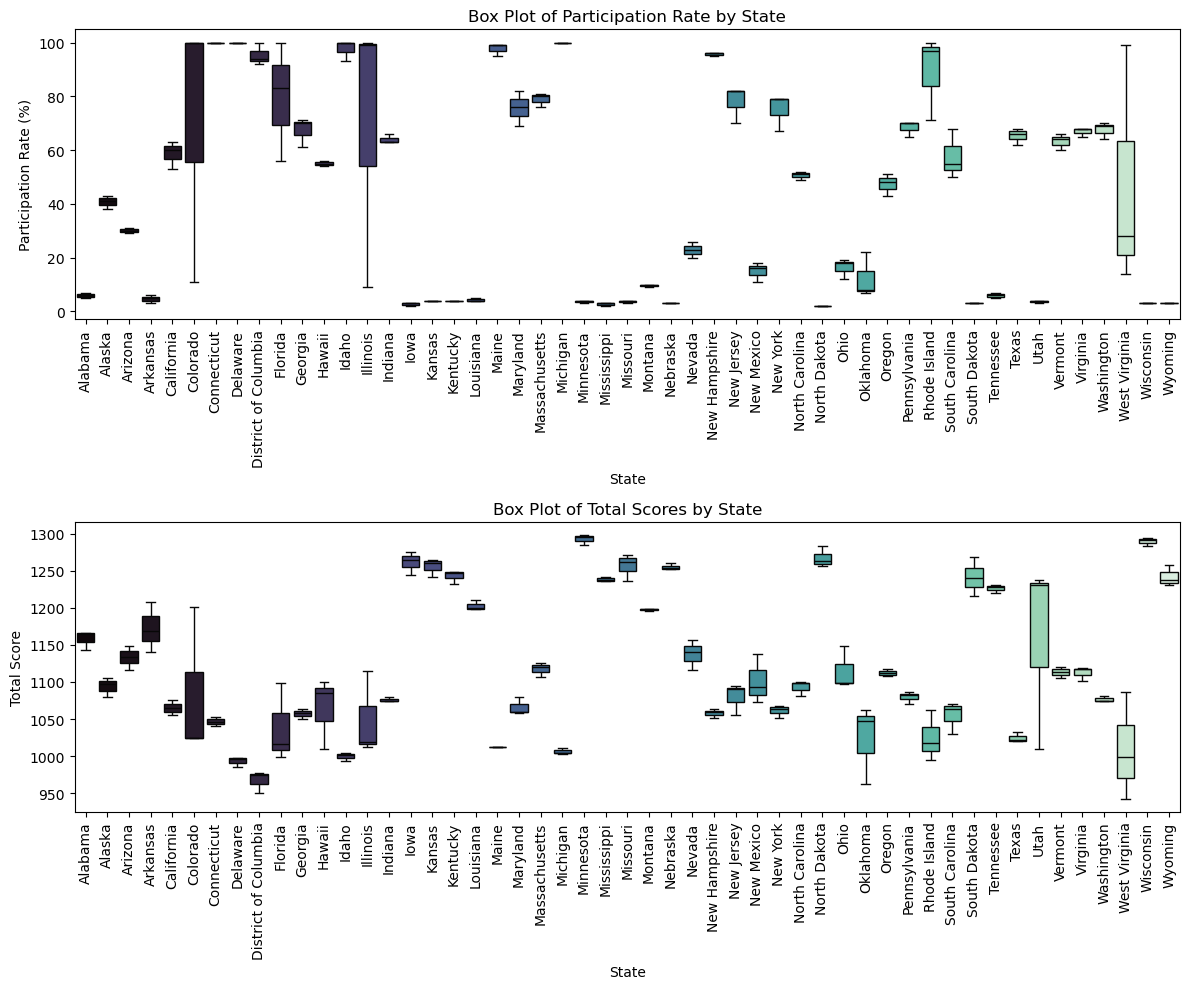

In [236]:
# Create a larger figure with two rows instead of side-by-side plots
plt.figure(figsize=(12, 10))

# Box plot for participation rate
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.boxplot(data=sat_combined, y='participation_rate', x='state', palette='mako')
plt.title('Box Plot of Participation Rate by State')
plt.ylabel('Participation Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Box plot for total score
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.boxplot(data=sat_combined, y='total', x='state', palette='mako')
plt.title('Box Plot of Total Scores by State')
plt.ylabel('Total Score')
plt.xlabel('State')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
